In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')
from matplotlib import rc, font_manager
if os.name == 'posix': 
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) 

%config InlineBackend.figure_format = 'retina'

In [2]:
os.curdir

'.'

In [3]:
regular=pd.read_csv("Regular_Season_Batter.csv")
regular.loc[regular['batter_name'] == '나종덕']

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
601,82,나종덕,2017,롯데,0.000,5,4,0,0,0,...,0,0.000,0.000,0,185cm/99kg,1998년 03월 16일,포수(우투우타),무학초-창원신월중-용마고,15000만원,0.000
602,82,나종덕,2018,롯데,0.124,106,177,15,22,3,...,2,0.175,0.201,4,185cm/99kg,1998년 03월 16일,포수(우투우타),무학초-창원신월중-용마고,15000만원,0.376


In [4]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

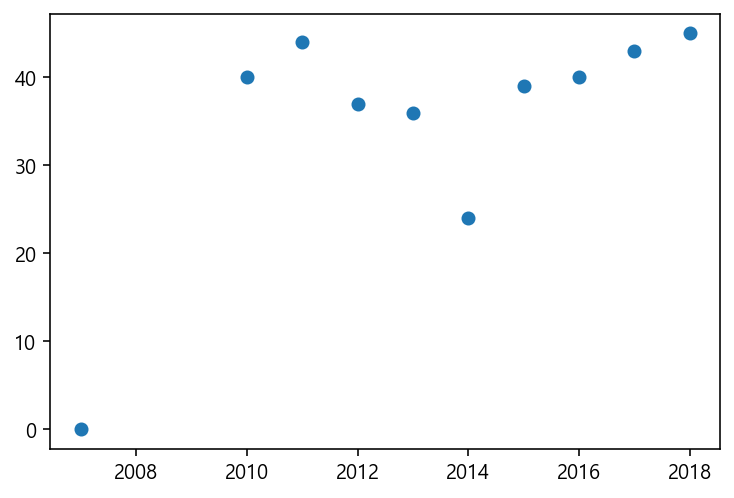

In [5]:
plt.scatter(regular.loc[regular['batter_name']=='양의지',]['year'],regular.loc[regular['batter_name']=='양의지',]['BB']) #와닿지 않음

Text(0.5, 1.0, '양의지 통산 OPS')

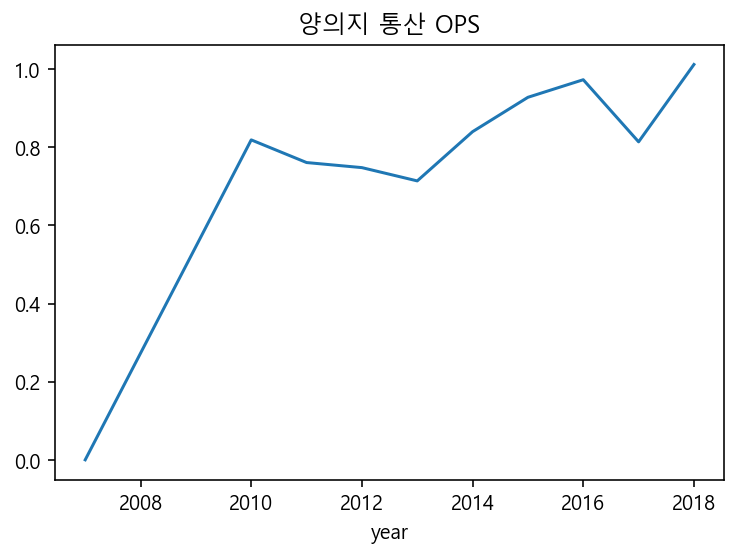

In [39]:
b=regular.loc[regular['batter_name']=='양의지',].groupby('year')['OPS'].mean().plot()
b.set_title("양의지 통산 OPS")

Text(0.5, 1.0, '양의지 통산 타율')

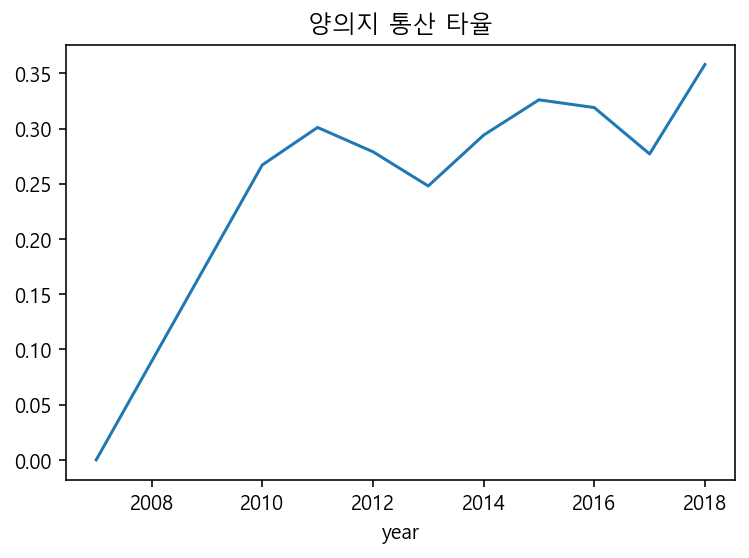

In [38]:
a= regular.loc[regular['batter_name']=='양의지',].groupby('year')['avg'].mean().plot()
a.set_title('양의지 통산 타율')

0.42406761190587683


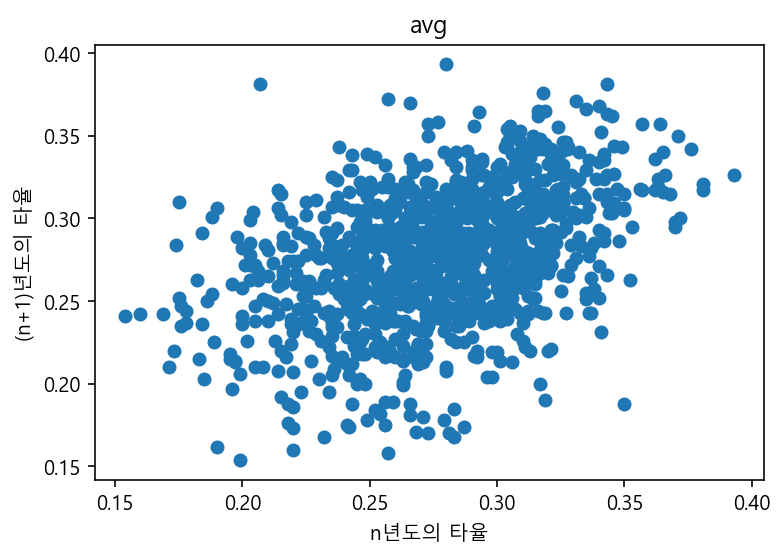

In [40]:
var = 'avg'
x=[]
y=[]
regular1 = regular.loc[regular['AB']>=100,]
for name in regular1['batter_name'].unique():
    a = regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])
plt.scatter(x,y)
plt.title(var)
plt.xlabel('n년도의 타율')
plt.ylabel('(n+1)년도의 타율')
print(pd.Series(x).corr(pd.Series(y)))

0.5967835522092053


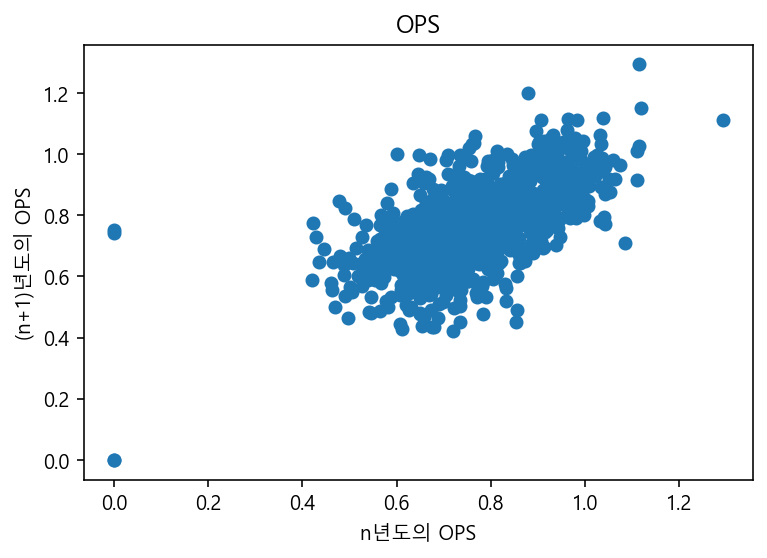

In [41]:
var = 'OPS'
x=[]
y=[]
regular1 = regular.loc[regular['AB']>=100,]
for name in regular1['batter_name'].unique():
    a = regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])
plt.scatter(x,y)
plt.title(var)
plt.xlabel('n년도의 OPS')
plt.ylabel('(n+1)년도의 OPS')
print(pd.Series(x).corr(pd.Series(y)))

In [10]:
def get_self_corr(var):
    x=[]
    y=[]
    regular1 = regular.loc[regular['AB']>=100,]
    for name in regular1['batter_name'].unique():
        a = regular1.loc[regular1['batter_name']==name,]
        k=[]
        for i in a['year'].unique():
            if (a['year']==i+1).sum()>0:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])

    return(pd.Series(x).corr(pd.Series(y)))

In [11]:
get_self_corr('avg')

0.42406761190587683

In [12]:
get_self_corr('OPS')

0.5967835522092053

In [13]:
agg={}
for i in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
        agg[i]=get_self_corr(i)

In [14]:
agg

{'avg': 0.42406761190587683,
 'G': 0.2827945222858424,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043601,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.44087969523833104,
 'HR': 0.7412597496536675,
 'TB': 0.6343944721859059,
 'RBI': 0.651947415097796,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546752,
 'BB': 0.6537531676446489,
 'HBP': 0.5627917256433479,
 'SO': 0.5664029028016614,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047514,
 'E': 0.6225595423969393}

In [15]:
#신뢰성이 있는 지표: 홈런, 삼진, 볼넷
#신뢰성이 낮은 지표: 3루타, 타율,2루타,1루타 (누적 성적)

In [16]:
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [17]:
total_2BnAB=[]
total_3BnAB=[]
total_avg=[]
for i in range(len(regular)):
    a=regular.loc[(regular['batter_name']==regular['batter_name'])&(regular['year']<regular['year'].iloc[i])]
    total_2BnAB.append(a['2B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append((a['avg']*a['AB']).sum()/a['AB'].sum())                                                                
                                                                   

In [18]:
regular['total_2BnAB'] = total_2BnAB
regular['total_3BnAB'] = total_3BnAB
regular['total_avg'] = total_avg

In [19]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'2B'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

0.022613065326633167

In [20]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'3B'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

0.017587939698492462

In [21]:
a=regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016)]
(a['avg']*a['AB']).sum()/a['AB'].sum()

0.24857537688442213

In [22]:
regular1['batter_name'].unique()

array(['가르시아', '강경학', '진갑용', '강민호', '강백호', '강병식', '강봉규', '강승호', '강정호',
       '강한울', '고동진', '고메즈', '고영민', '이종환', '고종욱', '구자욱', '국해성', '박재홍',
       '권용관', '권희동', '김강민', '김경언', '김규민', '박재상', '문선재', '김동엽', '김동욱',
       '김동주', '김동한', '김문호', '김민성', '김민식', '김민하', '김상수', '김상호', '김연훈',
       '김선빈', '김성욱', '김성현', '김성훈', '연경흠', '김용의', '김원석', '김원섭', '김재율',
       '김재현', '김재호', '김재환', '나바로', '김종호', '김주찬', '김주형', '김지수', '김태균',
       '김태완', '김하성', '김헌곤', '김현수', '김혜성', '김회성', '나경민', '나성범', '나종덕',
       '나주환', '나지완', '노수광', '노진혁', '대니돈', '러프', '로맥', '로메로', '로사리오',
       '로티노', '로하스', '류지혁', '모창민', '문규현', '문우람', '민병헌', '박건우', '박경수',
       '박계현', '박기남', '박기혁', '박동원', '박민우', '박병호', '박석민', '박세혁', '박승욱',
       '박용근', '박용택', '박정권', '박정음', '박준서', '박준태', '박지규', '박진만', '박한이',
       '박해민', '박헌도', '배영섭', '백상원', '백용환', '백창수', '버나디나', '번즈', '서건창',
       '서동욱', '서상우', '손시헌', '손아섭', '손주인', '송광민', '송성문', '송지만', '스나이더',
       '스크럭스', '신경현', '신명철', '신본기', '신성현', '신종길', '심우준', '안익훈', '안중열',
       '안치용', '안치홍

In [23]:
lag_1_OPS = []
for i in range(len(regular)):
    if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS'])==0:
        lag_1_OPS.append(np.nan)
    else:
        lag_1_OPS.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS'].iloc[0])

In [24]:
regular["lag_1_OPS"] = lag_1_OPS

In [25]:
lag_1_avg = []
for i in range(len(regular)):
    if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['avg'])==0:
        lag_1_avg.append(np.nan)
    else:
        lag_1_avg.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['avg'].iloc[0])

In [26]:
regular["lag_1_avg"] = lag_1_avg

In [27]:
for j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    lag_1_avg=[]
    for i in range(len(regular)):
        if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j])==0:
            lag_1_avg.append(np.nan)
        else:
            lag_1_avg.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    regular['lag_2_' + j] = lag_1_avg
    print(j)

avg
G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E


In [28]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'total_2BnAB', 'total_3BnAB', 'total_avg',
       'lag_1_OPS', 'lag_1_avg', 'lag_2_avg', 'lag_2_G', 'lag_2_AB', 'lag_2_R',
       'lag_2_H', 'lag_2_2B', 'lag_2_3B', 'lag_2_HR', 'lag_2_TB', 'lag_2_RBI',
       'lag_2_SB', 'lag_2_CS', 'lag_2_BB', 'lag_2_HBP', 'lag_2_SO',
       'lag_2_GDP', 'lag_2_SLG', 'lag_2_OBP', 'lag_2_E'],
      dtype='object')

In [29]:
regular = regular.loc[~regular['OPS'].isnull()]

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
y = regular['OPS'] #output
X=regular[['lag_1_OPS', 'lag_1_avg', 'lag_2_avg',
       'lag_2_G', 'lag_2_AB', 'lag_2_R', 'lag_2_H', 'lag_2_2B', 'lag_2_3B',
       'lag_2_HR', 'lag_2_TB', 'lag_2_RBI', 'lag_2_SB', 'lag_2_CS', 'lag_2_BB',
       'lag_2_HBP', 'lag_2_SO', 'lag_2_GDP', 'lag_2_SLG', 'lag_2_OBP',
       'lag_2_E']] #input

In [32]:
rf = RandomForestRegressor(n_estimators = 500) #treemodel을 몇 개 만들어서 ensemble 시키느냐?

In [33]:
rf.fit(X.fillna(-1),y)

RandomForestRegressor(n_estimators=500)

In [34]:
train = regular.loc[regular['year']<2017,]
test = regular.loc[regular['year']==2018,]
y_train = train['OPS']
X_train = train[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]

KeyError: "['lag_1_CS', 'lag_1_3B', 'lag_1_R', 'lag_1_2B', 'lag_1_BB', 'lag_1_SB', 'lag_1_H', 'lag_1_AB', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_E', 'lag_1_SO', 'lag_1_OBP', 'lag_1_HR', 'lag_1_HBP', 'lag_1_TB', 'lag_1_G', 'lag_1_RBI'] not in index"

In [ ]:
y_test= test['OPS']
X_test = test[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]

In [ ]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train.fillna(-1),y_train,sample_weight = train["AB"])

In [ ]:
pred=rf.predict(X_test.fillna(-1))

In [ ]:
real = test['OPS']
ab = test['AB']

In [ ]:
#wrmse
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred,sample_weight = ab)**0.5

In [ ]:
pred,real